In [43]:
from openqaoa.problems import MaximumCut
from openqaoa.backends import create_device
from openqaoa import QAOA
import networkx as nx
from qiskit.tools.visualization import plot_histogram
from openqaoa.utilities import random_k_regular_graph, plot_graph, flip_counts

In [24]:
from qiskit_ibm_provider import IBMProvider

In [25]:
provider = IBMProvider(hub)

In [31]:
# Set the start time for the job retrieval
start_time = '2023-04-18T00:00:00Z'  # format: YYYY-MM-DDTHH:MM:SSZ

# Retrieve all jobs submitted after the start time
jobs = provider.jobs(start_datetime=start_time,status="completed",backend_name="ibm_lagos",limit=100)

# Print information about the retrieved jobs
# for job in jobs:
#     print(f'Job ID: {job.job_id()}, Status: {job.status()}, Creation date: {job.creation_date()}')

In [44]:
retrieved_measurements = [job.result().get_counts() for job in jobs]

In [65]:
[print(instruction) for instruction in jobs[0].circuits()[0]["experiments"][0]["instructions"] if instruction["name"] == "cx"]

{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [1, 2]}
{'name': 'cx', 'qubits': [1, 2]}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [1, 3]}
{'name': 'cx', 'qubits': [3, 1]}
{'qubits': [1, 2], 'name': 'cx'}
{'name': 'cx', 'qubits': [1, 2]}
{'name': 'cx', 'qubits': [5, 3]}
{'name': 'cx', 'qubits': [5, 3]}
{'name': 'cx', 'qubits': [1, 3]}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [1, 3]}
{'name': 'cx', 'qubits': [1, 0]}
{'name': 'cx', 'qubits': [1, 0]}
{'name': 'cx', 'qubits': [3, 5]}
{'name': 'cx', 'qubits': [3, 5]}
{'qubits': [1, 3], 'name': 'cx'}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [1, 3]}
{'name': 'cx', 'qubits': [1, 0]}
{'name': 'cx', 'qubits': [5, 3]}
{'name': 'cx', 'qubits': [3, 5]}
{'qubits': [5, 3], 'name': 'cx'}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [1, 3]}
{'name': 'cx', 'qubits': [3, 1]}
{'name': 'cx', 'qubits': [2, 1]}
{'name': 'cx', 'qubits': [2, 1]}
{'name': '

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [91]:
jobs[0].circuits()

[{'type': 'QASM',
  'config': {'parameter_binds': [],
   'use_measure_esp': False,
   'memory': False,
   'n_qubits': 7,
   'rep_delay': 250,
   'meas_level': 2,
   'init_qubits': True,
   'memory_slots': 6,
   'shots': 2000,
   'parametric_pulses': ['gaussian',
    'gaussian_square',
    'gaussian_square_drag',
    'drag',
    'constant']},
  'header': {'backend_name': 'ibm_lagos', 'backend_version': '1.3.0'},
  'qobj_id': 'a4d6fcc8-54d5-4e70-beb6-253abdca44ea',
  'experiments': [{'config': {'n_qubits': 7, 'memory_slots': 6},
    'header': {'qreg_sizes': [['q', 7]],
     'clbit_labels': [['flattened', 0],
      ['flattened', 1],
      ['flattened', 2],
      ['flattened', 3],
      ['flattened', 4],
      ['flattened', 5]],
     'global_phase': 0,
     'qubit_labels': [['q', 0],
      ['q', 1],
      ['q', 2],
      ['q', 3],
      ['q', 4],
      ['q', 5],
      ['q', 6]],
     'n_qubits': 7,
     'creg_sizes': [['flattened', 6]],
     'memory_slots': 6,
     'name': 'circuit-586',
 

In [81]:
from qiskit.providers.aer import AerSimulator
from qiskit import execute
sim = AerSimulator()
job_results_sim = [execute(experiments = job.circuits()[0]["experiments"][0]["instructions"], backend=sim).result() for job in jobs]

AttributeError: Attribute calibrations is not defined.

In [76]:
jobs[0].circuits()[0]["experiments"][0]["instructions"]

[{'name': 'delay', 'params': [17280], 'qubits': [0]},
 {'name': 'sx', 'qubits': [0]},
 {'name': 'rz', 'params': [1.5707963267948966], 'qubits': [0]},
 {'name': 'sx', 'qubits': [1]},
 {'name': 'rz', 'params': [1.5707963267948966], 'qubits': [1]},
 {'name': 'delay', 'params': [2688], 'qubits': [2]},
 {'name': 'sx', 'qubits': [2]},
 {'name': 'rz', 'params': [1.5707963267948966], 'qubits': [2]},
 {'name': 'sx', 'qubits': [3]},
 {'name': 'rz', 'params': [3.141592653589793], 'qubits': [3]},
 {'name': 'cx', 'qubits': [3, 1]},
 {'name': 'rz', 'params': [8.981259787369586], 'qubits': [1]},
 {'name': 'cx', 'qubits': [3, 1]},
 {'name': 'cx', 'qubits': [1, 2]},
 {'name': 'rz', 'params': [8.981259787369586], 'qubits': [2]},
 {'name': 'cx', 'qubits': [1, 2]},
 {'params': [1040], 'qubits': [2], 'name': 'delay'},
 {'name': 'x', 'qubits': [2]},
 {'name': 'delay', 'params': [1952], 'qubits': [2]},
 {'name': 'x', 'qubits': [2]},
 {'qubits': [2], 'name': 'delay', 'params': [880]},
 {'name': 'delay', 'para

In [45]:
from openqaoa.backends.cost_function import cost_function
cost_value = []

In [9]:
from openqaoa.utilities import ground_state_hamiltonian
ground_state_hamiltonian(qubo.hamiltonian)

(-6.0, ['010110', '101001'])

In [10]:
q_sim = QAOA()
q_sim.set_device(create_device('local','qiskit.shot_simulator'))
q_sim.set_backend_properties(n_shots=2000)
q_sim.set_circuit_properties(param_type="standard",init_type="ramp")
q_sim.set_classical_optimizer(maxiter=20, method='COBYLA')
q_sim.compile(qubo)

In [11]:
q_sim.optimize()

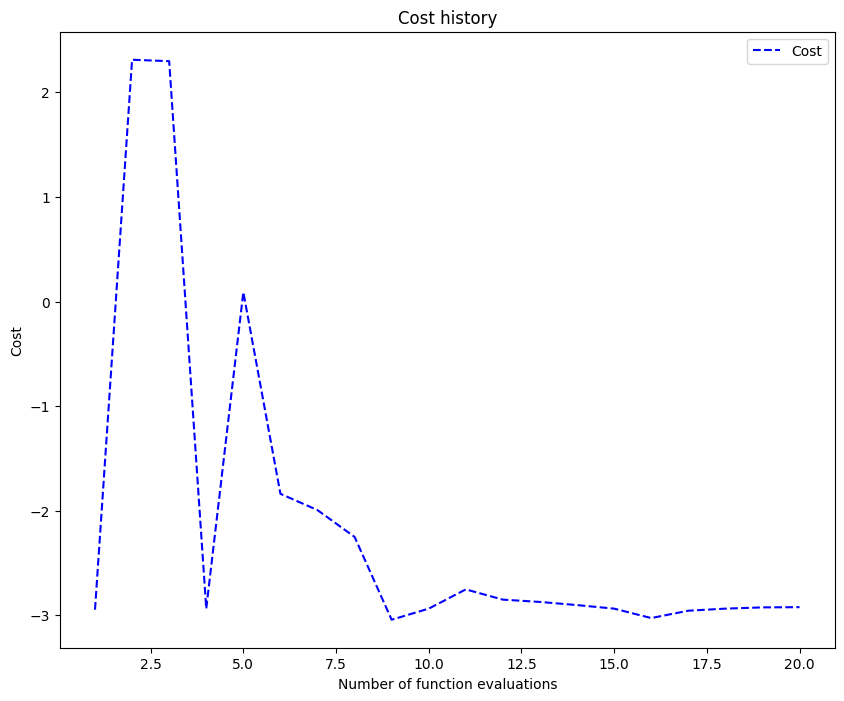

In [12]:
q_sim.result.plot_cost()

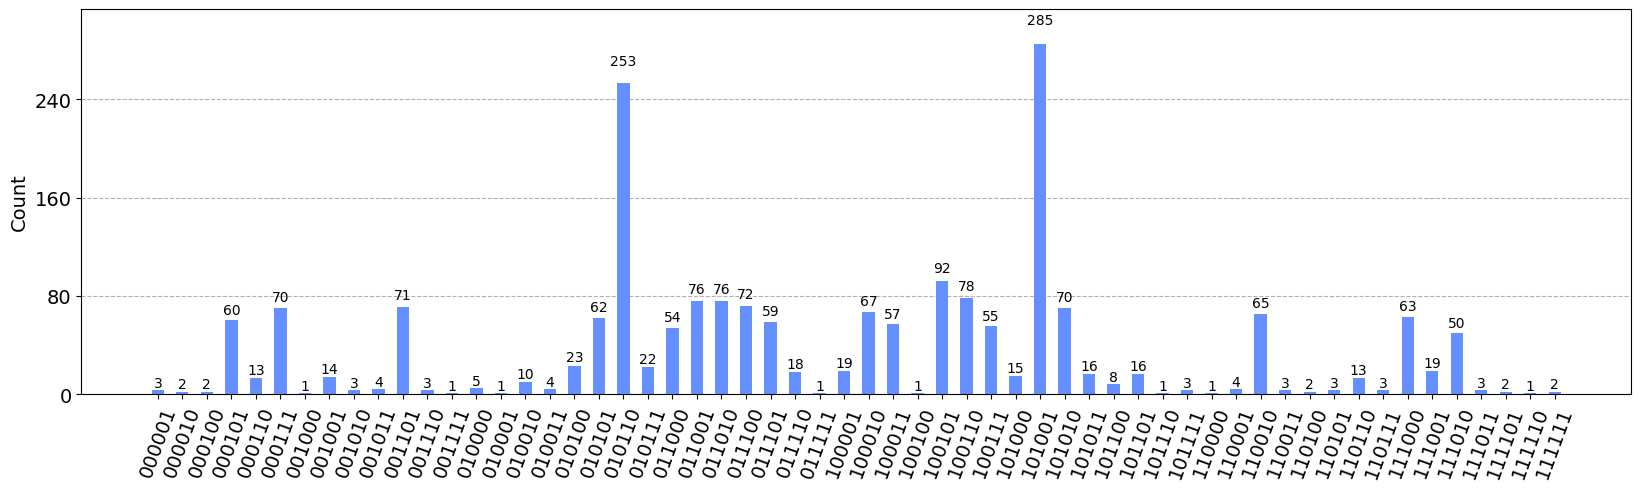

In [13]:
optimized_angles = q_sim.result.optimized["angles"]

#set variate angles with optimized value
q_sim.variate_params.update_from_raw(optimized_angles)

opt_counts_sim = q_sim.backend.get_counts(q_sim.variate_params)
plot_histogram(opt_counts_sim, figsize=(20,5))

In [15]:
fire_device = create_device('qctrl',
                    name='ibm_lagos',
                    hub='ibm-q-startup',
                    group='entropica-labs',
                    project='reservations')

In [19]:
q = QAOA()
q.set_device(fire_device)
q.set_circuit_properties(param_type="standard",init_type="ramp")
q.set_backend_properties(n_shots=2000)
q.set_classical_optimizer(method="COBYLA", maxiter=19)

In [20]:
q.compile(qubo)

## Experiment running OpenQAOA computations using FireOpal on IBMQ

In [ ]:
q.optimize()

In [1]:
q.dumps()

NameError: name 'q' is not defined

In [ ]:
from openqaoa.backends.cost_function import cost_function


In [ ]:
q.dump("Test_optimization_using_FireOpal")

## Solving Maxcut using FireOpal `solve_qaoa`

In [ ]:
fire_result = fireopal.solve_qaoa(prob.G, "maxcut", fire_device_reserved.credentials, fire_device_reserved.device_name)